# Análise de Vendas e Desempenho de Lojas - Alura Store

## Propósito da Análise

O objetivo desta análise é ajudar o Sr. João a decidir qual loja da sua rede Alura Store vender para iniciar um novo empreendimento.
Através de dados de vendas, avaliações e desempenho de 4 lojas fictícias da Alura Store, foram realizadas análises para identificar a loja com menor eficiência, a qual deve ser vendida.
Para isso, diversas métricas foram analisadas, incluindo faturamento, categorias mais vendidas, avaliação dos clientes, produtos mais e menos vendidos e frete médio.

## Estrutura do Projeto e Organização dos Arquivos

Este repositório contém o notebook que realiza a análise, bem como o código necessário para gerar insights e gráficos sobre o desempenho das lojas.
A estrutura do projeto é organizada da seguinte forma:<br><br>


-> Importação dos dados

1. Análise do faturamento

2. Vendas por Categoria

3. Média de Avaliação das Lojas

4. Produtos Mais e Menos Vendidos

5. Frete Médio por Loja<br><br>

## Relatório de Análise para Decisão de Venda da Loja<br><br>

Após a análise detalhada das informações fornecidas sobre as lojas da rede Alura Store, com base no faturamento total, vendas por categoria, média de avaliação, produtos mais e menos vendidos e custo médio de frete, o objetivo é determinar qual loja apresenta o menor desempenho e deve ser considerada para venda.<br><br>

##Relatório de Análise Comparativa – Lojas da Allure Store<br><br>

**<h3>Objetivo:**<br><br>

Auxiliar o Sr. João na decisão de venda de uma das quatro lojas da Allure Store, com base em indicadores de desempenho. <br><br>

O critério definido é desempenho geral mais fraco.<br><br>

**<h3>Indicadores Avaliados:**<br><br>

. Faturamento total

. Categorias mais vendidas

. Produto mais vendido

. Produto menos vendido

. Avaliação média dos clientes

. Frete médio

. Local de compra mais frequente

. Tipo de pagamento mais comum

. Desempenho por ano e mês (vendedores e local)<br><br>

**<h3>Faturamento Total**<br><br>

 Loja   |  Faturamento Total<br>
 -------|-------------------
Loja 1:	| R$ 1.616.347,09
     Loja 2: | R$ 1.567.773,22
        Loja 3:	| R$ 1.542.047,69
         Loja 4:	| R$ 1.458.253,46 🔻

 ![Faturamento](/faturamento.png)        

<br>**Análise:**<br><br>

A **Loja 4** tem o menor faturamento total entre todas as lojas. Isso é um indicativo de menor desempenho financeiro em relação às demais lojas.<br><br>

**<h3>Avaliação Média dos Clientes**<br><br>

Loja | Avaliação Média
-----|----------------
Loja 1: | 3.98 🔻
Loja 2:	| 4.04
Loja 3:	| 4.05
Loja 4:	| 4.00

<br>**Análise:**<br><br>

A **Loja 1** apresenta a menor média de avaliação dos clientes, o que sugere que a experiência de compra pode não ser tão satisfatória quanto nas outras lojas.<br><br>

**<h3>Frete Médio**<br><br>

Loja | Frete Médio
-----|------------
  Loja 1:	| R$ 34,69 🔻
     Loja 2:	| R$ 33,62
     Loja 3:	| R$ 33,07
       Loja 4:	| R$ 31,28

<br>**Análise:**<br><br>

A **Loja 4** possui o menor frete médio, o que pode ser considerado uma vantagem em termos de custo logístico, mas isso não compensa o desempenho em outras áreas.<br><br>

**<h3>Categorias Mais Vendidas por Loja**<br><br>

Loja | Top Categoria | Quantidade
-----|---------------|------------
Loja 1:	| Eletrônicos: | 469
Loja 2:	| Brinquedos: |440
Loja 3:	| Móveis:	| 453
Loja 4:	| Móveis:	| 480

<br>**Análise:**<br><br>

A **Loja 4** lidera nas vendas de móveis, mas isso não se traduz em um faturamento superior. Apesar de ser a líder em sua categoria, a Loja 4 não lidera em termos financeiros.

**<h3>Produtos Mais e Menos Vendidos**<br><br>

**Produtos Mais Vendidos (Top 10 de Todas as Lojas)**<br><br>

Produto | Quantidade
--------|------------
Cômoda:	| 210
Carrinho controle remoto: | 206
Micro-ondas: | 206
Bateria: | 203
Cama king: | 201
Secadora de roupas: | 200
Modelagem preditiva: | 200
Jogo de panelas: | 200
Cama box: | 199
Blocos de montar: | 199

<br>**Análise:**<br><br>

Os produtos mais vendidos mostram uma tendência clara de alta demanda em itens como móveis e eletrodomésticos. A Cômoda e o Carrinho controle remoto estão entre os produtos de maior destaque.<br><br>

**Produtos Menos Vendidos (Top 10 de Todas as Lojas)**

Produto	| Quantidade
--------|-------------
Panela de pressão |	172
Smartwatch | 172
Jogo de copos | 169
Poltrona | 168
Assistente virtual | 167
Ciência de dados com python | 166
Guitarra | 165
Mochila	| 163
Headset | 158
Celular ABXY | 157

<br>**Análise:**<br><br>

Os produtos menos vendidos incluem itens como Smartwatch e Poltrona, com vendas notavelmente mais baixas. Esses produtos podem estar passando por menos procura no mercado.<br><br>

**Local com Mais Compras (por ano)**<br><br>

Todas as lojas têm São Paulo (SP) como principal local de compras em todos os anos e meses, indicando um padrão uniforme de operação geográfica. Isso não mostra grandes diferenças entre as lojas em termos de distribuição geográfica das vendas.<br><br>

**Tipo de Pagamento Mais Utilizado (por ano e mês)**<br><br>

Em todas as lojas, o cartão de crédito é o tipo de pagamento mais utilizado. Isso também indica um padrão semelhante de consumo entre as lojas, com a preferência dos clientes pelo pagamento parcelado.<br><br>

**Vendedor com Mais Vendas por Ano**<br><br>

Loja 4 (Exemplo)

Ano | Top Vendedor
----|---------------
2020 | João Souza
2021 | Mariana Ferreira
2022 | Felipe Santos
2023 | Felipe Santos

<br>**Análise:**<br><br>

A **Loja 4** apresenta uma variação de vendedores ao longo dos anos, com uma leve repetição de Felipe Santos como vendedor de destaque em 2022 e 2023, o que sugere uma estabilidade recente.<br><br>


**Resumo Geral Comparativo**

Indicador	| Loja 1 | Loja 2 | Loja 3 | Loja 4 | Pior Desempenho
----------|--------|--------|--------|--------|-------------------
        Faturamento Total|R$ 1.616.347|R$ 1.567.773|R$ 1.542.047|R$ 1.458.253|Loja 4
      Avaliação Média |	3.98 |	4.04 |	4.05 |	4.00 |	Loja 1
           Frete Médio |	R$ 34,69 |	R$ 33,62 |	R$ 33,07 |	R$ 31,28 |	Loja 1
Estabilidade em Vendas |	OK |	OK |	OK |	🔻 Variável |	Loja 4
Crescimento | 2023 |	Estável |	Estável |	Estável |	🔻 Reduzido |	Loja 4


<br>**Recomendação Final**<br><br>

**Vender a Loja 4**<br><br>

**Justificativas:**<br><br>

Menor faturamento absoluto: A Loja 4 apresenta o menor faturamento total, o que indica um desempenho financeiro mais fraco.<br><br>

Desempenho de vendas mais fraco em 2023: O desempenho da Loja 4 foi mais fraco em termos de crescimento e estabilidade nas vendas.<br><br>

Menor estabilidade nos rankings de vendedores: A variação na liderança dos vendedores da Loja 4 sugere menos estabilidade no time de vendas.<br><br>

Avaliação de clientes e frete não compensam a baixa performance: Embora a Loja 4 tenha o frete mais baixo, sua avaliação de clientes e o desempenho geral não são suficientes para compensar o menor faturamento.<br><br>

Potencial menor de crescimento: Com um desempenho de vendas reduzido e instabilidade em 2023, a Loja 4 apresenta um potencial de crescimento menor em comparação com as outras lojas.<br><br>

Essa análise indica que a Loja 4 deve ser vendida para focar em opções com melhor desempenho financeiro e potencial de crescimento.<br><br>


**<u>Análise Conclusiva</u>**<br><br>

Apesar da Loja 4 ter o custo médio de frete mais baixo e um desempenho razoável em algumas categorias de vendas, ela apresenta o menor faturamento total e a menor média de avaliação dos clientes. Além disso, a Loja 4 tem um desempenho inferior em várias categorias de produto, especialmente quando comparada à Loja 3, que apresenta o melhor desempenho de avaliação e faturamento.<br><br>

A Loja 4 parece ser a que apresenta maior risco para o negócio no momento, tanto em termos de faturamento quanto de satisfação do cliente. Embora o custo de frete seja favorável, a menor avaliação e o menor faturamento total indicam que ela é a candidata mais provável para venda.<br><br>

**<u>Recomendação</u>**<br><br>

Com base em uma análise combinada dos dados de faturamento, avaliação dos clientes e desempenho geral, recomenda-se que a **Loja 4** seja a loja a ser vendida para possibilitar o investimento em um novo empreendimento.


## Instruções para Executar o Notebook

Para executar o notebook e reproduzir a análise, siga os passos abaixo:

### Pré-requisitos

- Ter o Python 3 instalado no seu ambiente.
- Instalar as bibliotecas necessárias com o comando:
  
  ```bash
  pip install pandas matplotlib numpy

**<u>Passos</u>**<br><br>

. Clone ou faça o download deste repositório.

. Abra o notebook AluraStoreBr.ipynb no Google Colab.

. Execute as células do notebook para realizar as análises. A primeira célula
  carrega os dados e as bibliotecas necessárias.

. Observe os gráficos gerados e os insights nas células subsequentes.<br><br>

Após a execução do notebook, você terá uma visão clara do desempenho das lojas e poderá determinar qual loja deve ser vendida com base nas análises realizadas.


### Importação dos dados



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [2]:
# Criando o dicionário com todas as lojas
lojas = {
    'Loja 1': loja,
    'Loja 2': loja2,
    'Loja 3': loja3,
    'Loja 4': loja4
}

# -----------------------------
# 1. Faturamento Total por Loja
# -----------------------------
print("### Faturamento Total por Loja ###")
faturamentos = {}
for nome, df in lojas.items():
    # Conversão de data com dayfirst=True
    df['Data da Compra'] = pd.to_datetime(df['Data da Compra'], dayfirst=True)

    # Cálculo do faturamento
    df['faturamento'] = df['Preço'] + df['Frete']
    total = df['faturamento'].sum()
    faturamentos[nome] = total
    print(f"Faturamento total da {nome}: R${total:,.2f}")

# ---------------------------------------------------
# 2. Análises mensais e anuais por vendedor, local e pagamento
# ---------------------------------------------------
for nome, df in lojas.items():
    print(f"\n### Análises por mês e ano para {nome} ###")

    # Extração do mês e do ano
    df['Ano'] = df['Data da Compra'].dt.year
    df['Mês'] = df['Data da Compra'].dt.month

    # ----------------------------
    # Vendedor que mais vendeu
    # ----------------------------
    print("\nVendedor que mais vendeu por ANO:")
    print(df.groupby('Ano')['Vendedor'].agg(lambda x: x.value_counts().idxmax()))

    print("\nVendedor que mais vendeu por MÊS:")
    print(df.groupby(['Ano', 'Mês'])['Vendedor'].agg(lambda x: x.value_counts().idxmax()))

    # ----------------------------
    # Local que mais comprou
    # ----------------------------
    print("\nLocal com mais compras por ANO:")
    print(df.groupby('Ano')['Local da compra'].agg(lambda x: x.value_counts().idxmax()))

    print("\nLocal com mais compras por MÊS:")
    print(df.groupby(['Ano', 'Mês'])['Local da compra'].agg(lambda x: x.value_counts().idxmax()))

    # ----------------------------
    # Tipo de pagamento mais usado
    # ----------------------------
    print("\nTipo de pagamento mais utilizado por ANO:")
    print(df.groupby('Ano')['Tipo de pagamento'].agg(lambda x: x.value_counts().idxmax()))

    print("\nTipo de pagamento mais utilizado por MÊS:")
    print(df.groupby(['Ano', 'Mês'])['Tipo de pagamento'].agg(lambda x: x.value_counts().idxmax()))





### Faturamento Total por Loja ###
Faturamento total da Loja 1: R$1,616,347.09
Faturamento total da Loja 2: R$1,567,773.22
Faturamento total da Loja 3: R$1,542,047.69
Faturamento total da Loja 4: R$1,458,253.46

### Análises por mês e ano para Loja 1 ###

Vendedor que mais vendeu por ANO:
Ano
2020    Rafael Costa
2021    Thiago Silva
2022     Pedro Gomes
2023     Pedro Gomes
Name: Vendedor, dtype: object

Vendedor que mais vendeu por MÊS:
Ano   Mês
2020  1          Thiago Silva
      2         Felipe Santos
      3        Lucas Oliveira
      4        Beatriz Moraes
      5            João Souza
      6            João Souza
      7          Rafael Costa
      8         Felipe Santos
      9          Thiago Silva
      10        Bianca Santos
      11        Larissa Alves
      12         Thiago Silva
2021  1          Thiago Silva
      2          Thiago Silva
      3         Bianca Santos
      4          Thiago Silva
      5            João Souza
      6         Bianca Santos
      7

<ipython-input-3-8023ffa8b736>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(faturamentos.keys()), y=list(faturamentos.values()), palette="Blues_d")


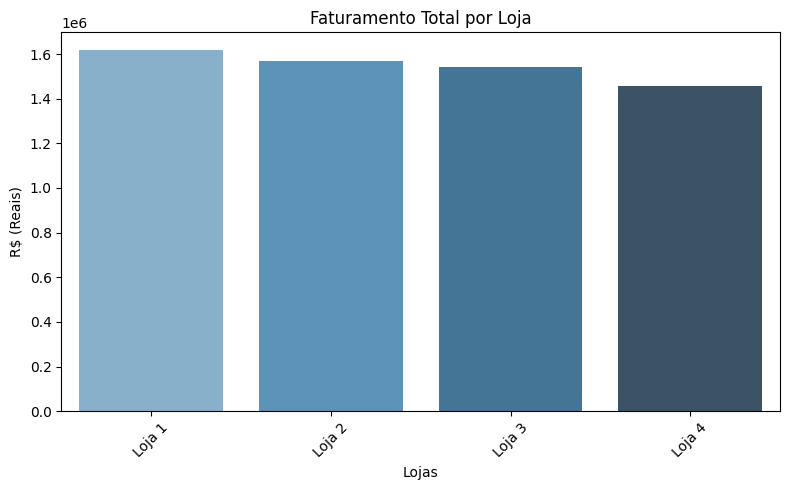

In [3]:
# Gráfico de barras
plt.figure(figsize=(8,5))
sns.barplot(x=list(faturamentos.keys()), y=list(faturamentos.values()), palette="Blues_d")
plt.title("Faturamento Total por Loja")
plt.ylabel("R$ (Reais)")
plt.xlabel("Lojas")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Vendas por Categoria



Categorias mais vendidas da Loja 1:
Categoria do Produto
moveis                   465
eletronicos              448
brinquedos               324
eletrodomesticos         312
esporte e lazer          284
instrumentos musicais    182
livros                   173
utilidades domesticas    171
Name: count, dtype: int64

Categorias mais vendidas da Loja 2:
Categoria do Produto
moveis                   442
eletronicos              422
brinquedos               313
eletrodomesticos         305
esporte e lazer          275
instrumentos musicais    224
livros                   197
utilidades domesticas    181
Name: count, dtype: int64

Categorias mais vendidas da Loja 3:
Categoria do Produto
moveis                   499
eletronicos              451
brinquedos               315
eletrodomesticos         278
esporte e lazer          277
livros                   185
instrumentos musicais    177
utilidades domesticas    177
Name: count, dtype: int64

Categorias mais vendidas da Loja 4:
Categoria do Pr

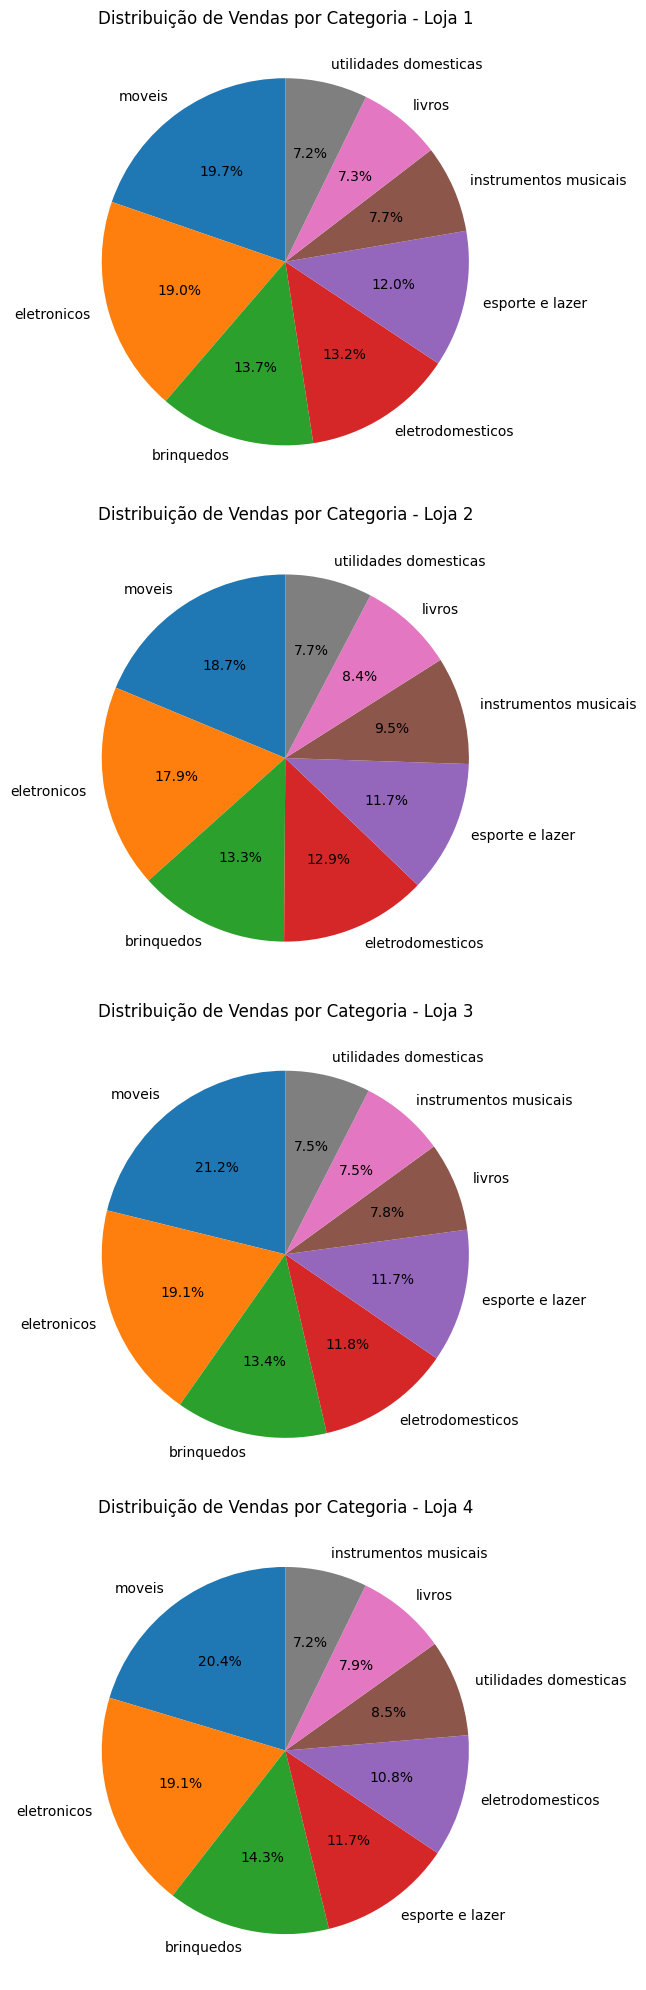

In [5]:
# 2. VENDAS POR CATEGORIA (PIZZA)
# -------------------------------
fig, axs = plt.subplots(4, 1, figsize=(8, 20))
for i, (nome, df) in enumerate(lojas.items()):
    categorias = df['Categoria do Produto'].value_counts()
    print(f"\nCategorias mais vendidas da {nome}:\n{categorias}")
    axs[i].pie(categorias, labels=categorias.index, autopct='%1.1f%%', startangle=90)
    axs[i].set_title(f"Distribuição de Vendas por Categoria - {nome}")
plt.tight_layout()
plt.show()


# 3. Média de Avaliação das Lojas

In [6]:
# 3. MÉDIA DE AVALIAÇÃO DAS LOJAS
# -------------------------------
avaliacoes = {}
for nome, df in lojas.items():
    media = df['Avaliação da compra'].mean()
    avaliacoes[nome] = media
    print(f"Média de Avaliação da {nome}: {media:.2f}")



Média de Avaliação da Loja 1: 3.98
Média de Avaliação da Loja 2: 4.04
Média de Avaliação da Loja 3: 4.05
Média de Avaliação da Loja 4: 4.00


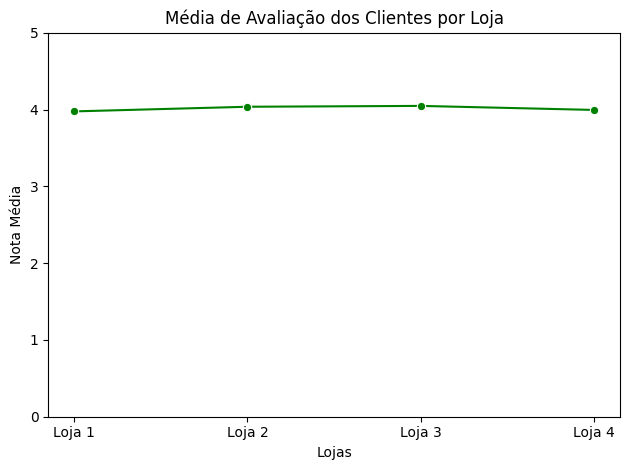

In [7]:
plt.figure()
sns.lineplot(x=list(avaliacoes.keys()), y=list(avaliacoes.values()), marker='o', color='green')
plt.title("Média de Avaliação dos Clientes por Loja")
plt.ylabel("Nota Média")
plt.xlabel("Lojas")
plt.ylim(0, 5)
plt.tight_layout()
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [8]:
# 4. PRODUTOS MAIS E MENOS VENDIDOS POR LOJA
# ----------------------------------

# Loja 1
mais_vendidos_loja1 = loja['Produto'].value_counts().head(10)
menos_vendidos_loja1 = loja['Produto'].value_counts().tail(10)

print("\nTop 10 Produtos Mais Vendidos - Loja 1:")
print(mais_vendidos_loja1)
print("\nTop 10 Produtos Menos Vendidos - Loja 1:")
print(menos_vendidos_loja1)

# Loja 2
mais_vendidos_loja2 = loja2['Produto'].value_counts().head(10)
menos_vendidos_loja2 = loja2['Produto'].value_counts().tail(10)

print("\nTop 10 Produtos Mais Vendidos - Loja 2:")
print(mais_vendidos_loja2)
print("\nTop 10 Produtos Menos Vendidos - Loja 2:")
print(menos_vendidos_loja2)

# Loja 3
mais_vendidos_loja3 = loja3['Produto'].value_counts().head(10)
menos_vendidos_loja3 = loja3['Produto'].value_counts().tail(10)

print("\nTop 10 Produtos Mais Vendidos - Loja 3:")
print(mais_vendidos_loja3)
print("\nTop 10 Produtos Menos Vendidos - Loja 3:")
print(menos_vendidos_loja3)

# Loja 4
mais_vendidos_loja4 = loja4['Produto'].value_counts().head(10)
menos_vendidos_loja4 = loja4['Produto'].value_counts().tail(10)

print("\nTop 10 Produtos Mais Vendidos - Loja 4:")
print(mais_vendidos_loja4)
print("\nTop 10 Produtos Menos Vendidos - Loja 4:")
print(menos_vendidos_loja4)




Top 10 Produtos Mais Vendidos - Loja 1:
Produto
Micro-ondas           60
TV Led UHD 4K         60
Guarda roupas         60
Secadora de roupas    58
Cômoda                56
Blocos de montar      56
Bola de basquete      55
Bicicleta             54
Copo térmico          54
Geladeira             54
Name: count, dtype: int64

Top 10 Produtos Menos Vendidos - Loja 1:
Produto
Boneca bebê                    40
Mesa de jantar                 40
Dinossauro Rex                 40
Corda de pular                 40
Mochila                        39
Ciência de dados com python    39
Pandeiro                       36
Panela de pressão              35
Headset                        33
Celular ABXY                   33
Name: count, dtype: int64

Top 10 Produtos Mais Vendidos - Loja 2:
Produto
Iniciando em programação    65
Micro-ondas                 62
Bateria                     61
Violão                      58
Pandeiro                    58
Secadora de roupas          57
Celular Plus X42        

<ipython-input-12-718aa2c7f0a2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mais_vendidos_loja1.values, y=mais_vendidos_loja1.index, palette="Greens_d")


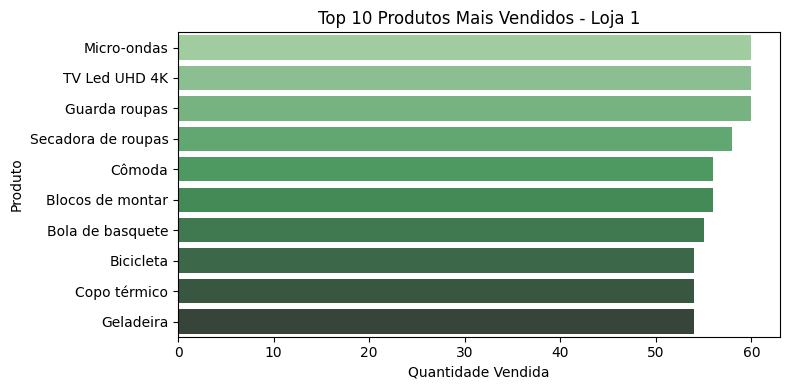

<ipython-input-12-718aa2c7f0a2>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=menos_vendidos_loja1.values, y=menos_vendidos_loja1.index, palette="Reds_d")


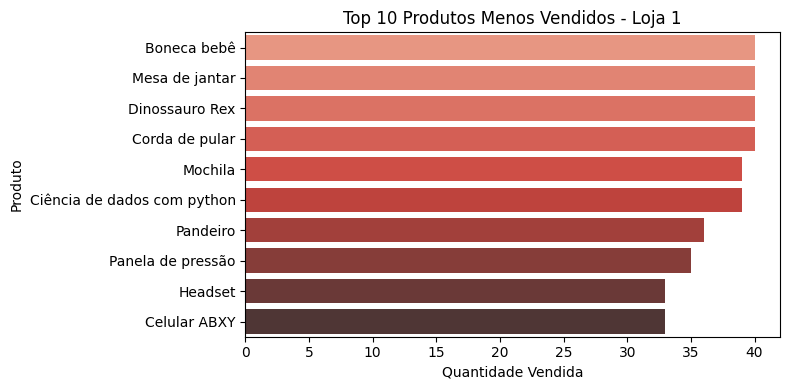

<ipython-input-12-718aa2c7f0a2>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mais_vendidos_loja2.values, y=mais_vendidos_loja2.index, palette="Greens_d")


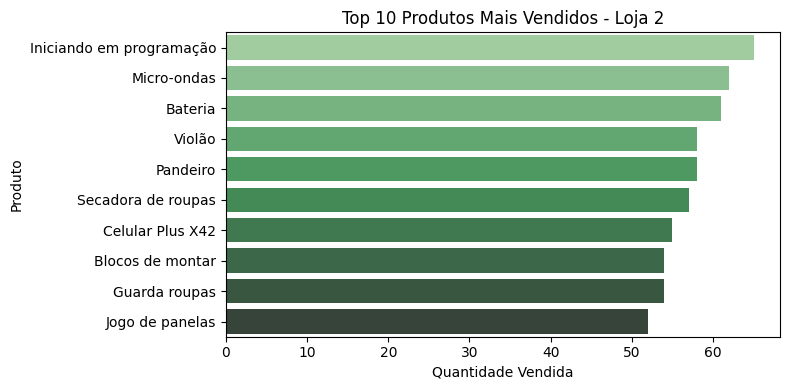

<ipython-input-12-718aa2c7f0a2>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=menos_vendidos_loja2.values, y=menos_vendidos_loja2.index, palette="Reds_d")


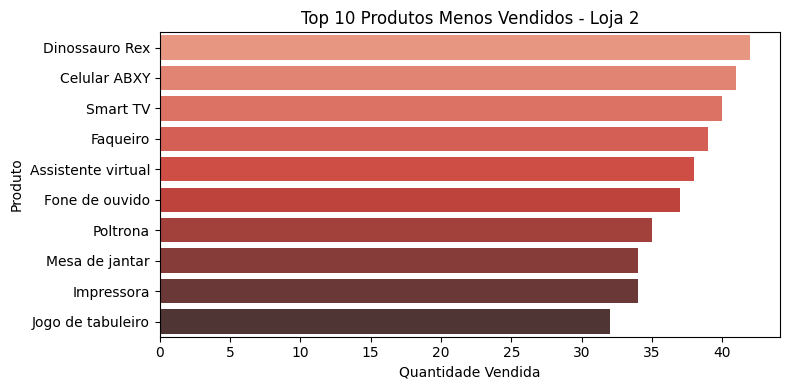

<ipython-input-12-718aa2c7f0a2>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mais_vendidos_loja3.values, y=mais_vendidos_loja3.index, palette="Greens_d")


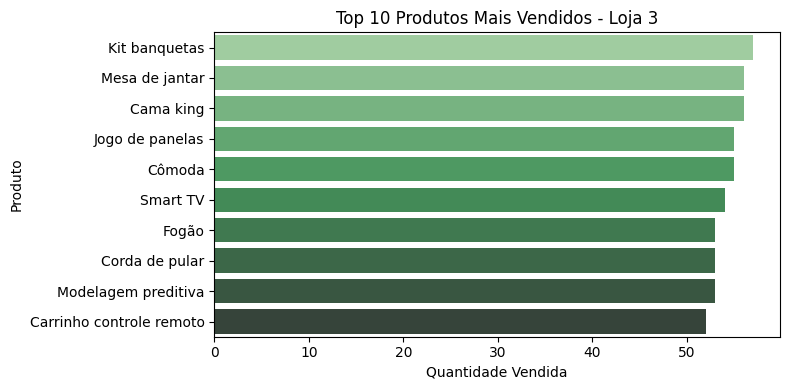

<ipython-input-12-718aa2c7f0a2>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=menos_vendidos_loja3.values, y=menos_vendidos_loja3.index, palette="Reds_d")


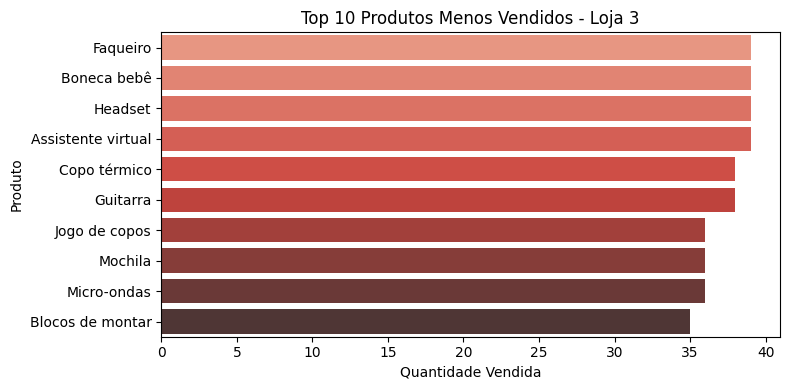

<ipython-input-12-718aa2c7f0a2>:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mais_vendidos_loja4.values, y=mais_vendidos_loja4.index, palette="Greens_d")


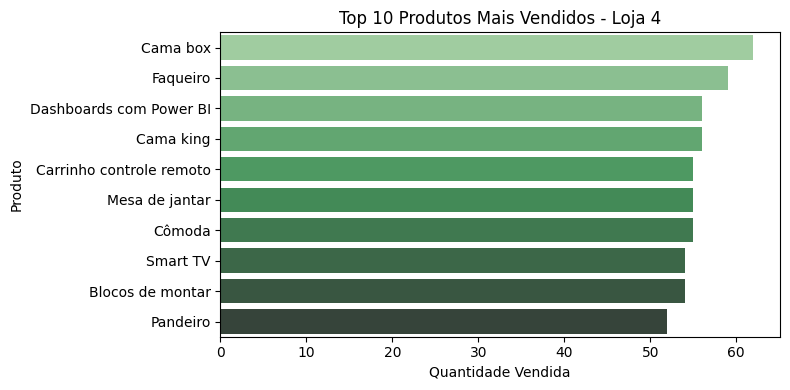

<ipython-input-12-718aa2c7f0a2>:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=menos_vendidos_loja4.values, y=menos_vendidos_loja4.index, palette="Reds_d")


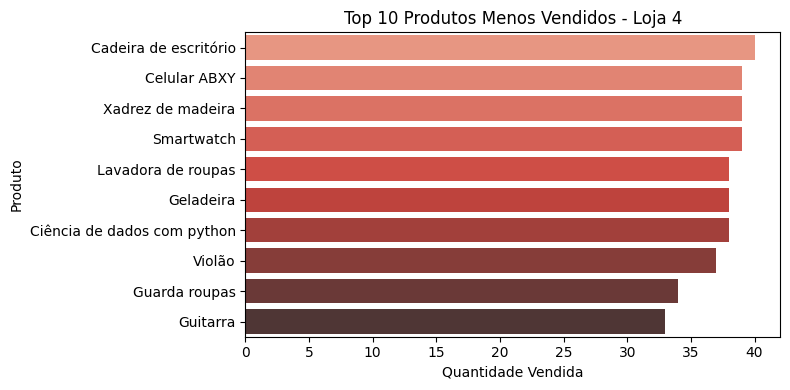

In [12]:
# Plot Top 10 Produtos Mais Vendidos - Loja 1
plt.figure(figsize=(8, 4))
sns.barplot(x=mais_vendidos_loja1.values, y=mais_vendidos_loja1.index, palette="Greens_d")
plt.title("Top 10 Produtos Mais Vendidos - Loja 1")
plt.xlabel("Quantidade Vendida")
plt.tight_layout()
plt.show()

# Plot Top 10 Produtos Menos Vendidos - Loja 1
plt.figure(figsize=(8, 4))
sns.barplot(x=menos_vendidos_loja1.values, y=menos_vendidos_loja1.index, palette="Reds_d")
plt.title("Top 10 Produtos Menos Vendidos - Loja 1")
plt.xlabel("Quantidade Vendida")
plt.tight_layout()
plt.show()

# Plot Top 10 Produtos Mais Vendidos - Loja 2
plt.figure(figsize=(8, 4))
sns.barplot(x=mais_vendidos_loja2.values, y=mais_vendidos_loja2.index, palette="Greens_d")
plt.title("Top 10 Produtos Mais Vendidos - Loja 2")
plt.xlabel("Quantidade Vendida")
plt.tight_layout()
plt.show()

# Plot Top 10 Produtos Menos Vendidos - Loja 2
plt.figure(figsize=(8, 4))
sns.barplot(x=menos_vendidos_loja2.values, y=menos_vendidos_loja2.index, palette="Reds_d")
plt.title("Top 10 Produtos Menos Vendidos - Loja 2")
plt.xlabel("Quantidade Vendida")
plt.tight_layout()
plt.show()

# Plot Top 10 Produtos Mais Vendidos - Loja 3
plt.figure(figsize=(8, 4))
sns.barplot(x=mais_vendidos_loja3.values, y=mais_vendidos_loja3.index, palette="Greens_d")
plt.title("Top 10 Produtos Mais Vendidos - Loja 3")
plt.xlabel("Quantidade Vendida")
plt.tight_layout()
plt.show()

# Plot Top 10 Produtos Menos Vendidos - Loja 3
plt.figure(figsize=(8, 4))
sns.barplot(x=menos_vendidos_loja3.values, y=menos_vendidos_loja3.index, palette="Reds_d")
plt.title("Top 10 Produtos Menos Vendidos - Loja 3")
plt.xlabel("Quantidade Vendida")
plt.tight_layout()
plt.show()

# Plot Top 10 Produtos Mais Vendidos - Loja 4
plt.figure(figsize=(8, 4))
sns.barplot(x=mais_vendidos_loja4.values, y=mais_vendidos_loja4.index, palette="Greens_d")
plt.title("Top 10 Produtos Mais Vendidos - Loja 4")
plt.xlabel("Quantidade Vendida")
plt.tight_layout()
plt.show()

# Plot Top 10 Produtos Menos Vendidos - Loja 4
plt.figure(figsize=(8, 4))
sns.barplot(x=menos_vendidos_loja4.values, y=menos_vendidos_loja4.index, palette="Reds_d")
plt.title("Top 10 Produtos Menos Vendidos - Loja 4")
plt.xlabel("Quantidade Vendida")
plt.tight_layout()
plt.show()


# 5. Frete Médio por Loja


In [10]:
# 5. FRETE MÉDIO POR LOJA
# ------------------------
fretes = {}
for nome, df in lojas.items():
    media_frete = df['Frete'].mean()
    fretes[nome] = media_frete
    print(f"Frete médio da {nome}: R${media_frete:.2f}")



Frete médio da Loja 1: R$34.69
Frete médio da Loja 2: R$33.62
Frete médio da Loja 3: R$33.07
Frete médio da Loja 4: R$31.28


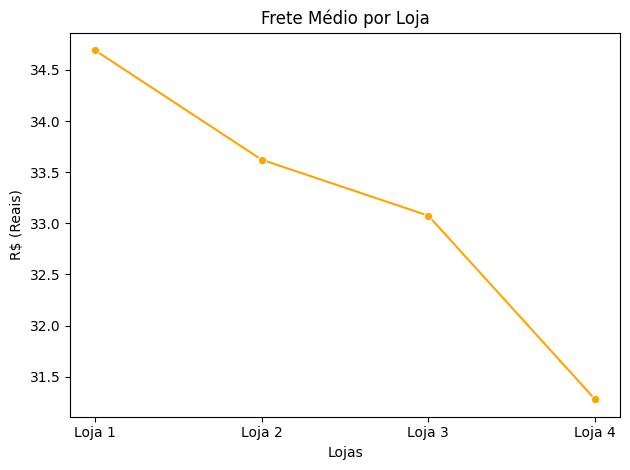

In [11]:
plt.figure()
sns.lineplot(x=list(fretes.keys()), y=list(fretes.values()), marker='o', color='orange')
plt.title("Frete Médio por Loja")
plt.ylabel("R$ (Reais)")
plt.xlabel("Lojas")
plt.tight_layout()
plt.show()

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
